# Tut - 5

This tutorial deals mainly with opening and reading fits files using the astropy module. Astropy is a python module used for astronomy and astrophysics related tasks. fits files are frequently used to store data of astronomical observations.

Given: Messier3_raw.fits - a fits file with an image of Messier3

Task:
Estimate the distribution of the background counts in the given image.
As you can imagine, the background rates are more or less random. However, they do follow some probability distribution. Your task is to numerically plot this distribution. Try to use only the parts of the image not containing the cluster.


In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats
#imports



<IPython.core.display.Javascript object>


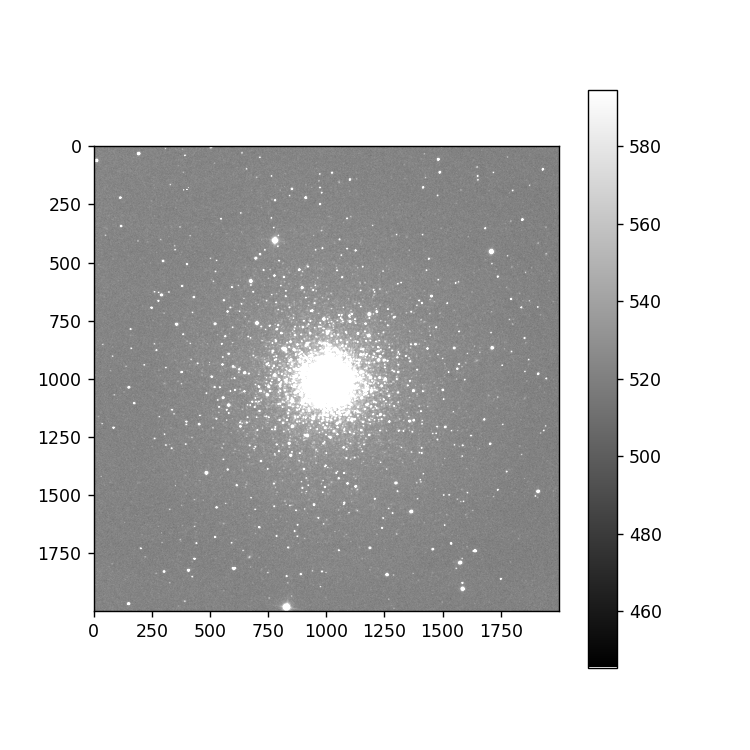

In [7]:

m3_fits = fits.open('Messier3_raw.fits') #open the fits files

m3_data = m3_fits[0].data #m3_fits[0] gives the only piece of data in this fits file

mean, median, std = sigma_clipped_stats(m3_data)

# use mean median etc to remove outliers
plt.figure(figsize=(6,6))


plt.imshow(m3_data[1000:3000,1000:3000], vmin = median - 5*std, vmax = median + 5*std, cmap='gray')
plt.colorbar() #plot image

In [8]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels
#creating a histogram for the array of pixels.

<IPython.core.display.Javascript object>


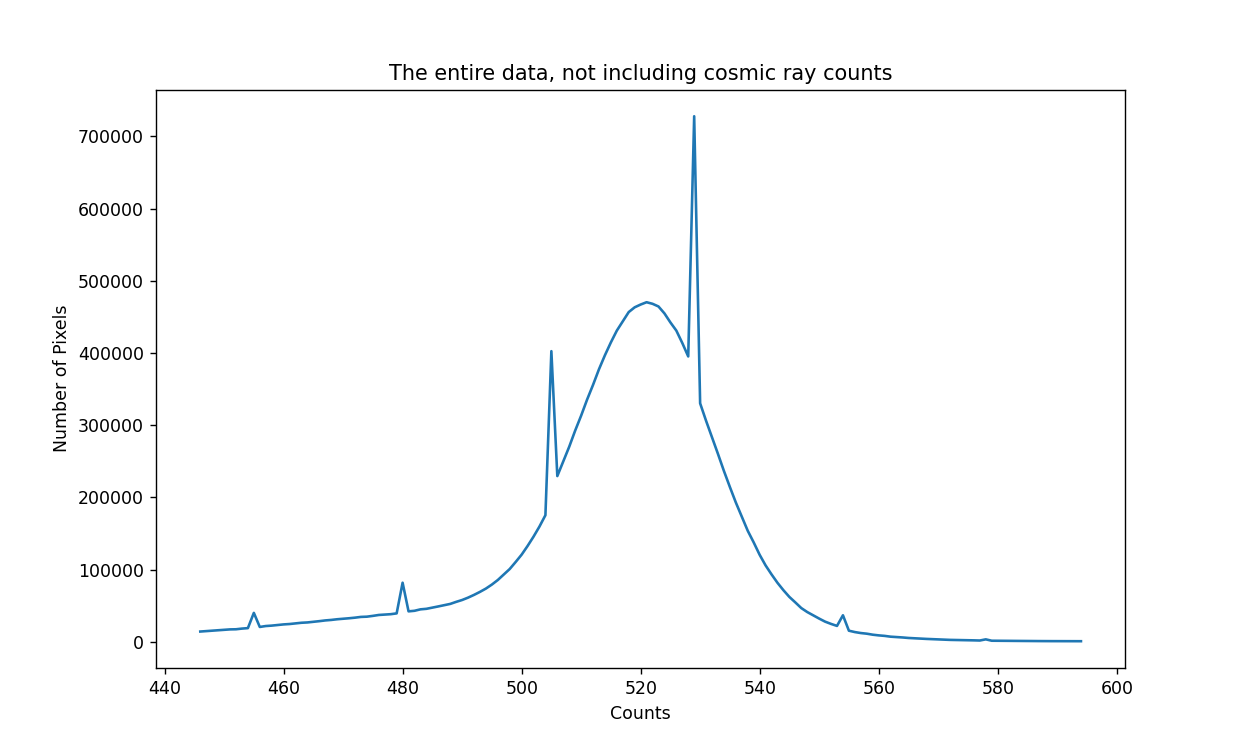

In [9]:
vmin = median - 5*std
vmax = median + 5*std
bins, num_pixels = get_background_histogram(m3_data,vmin,vmax) #entire data, not including cosmic ray counts

plt.figure(figsize = (10,6))
plt.title("The entire data, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)

<IPython.core.display.Javascript object>


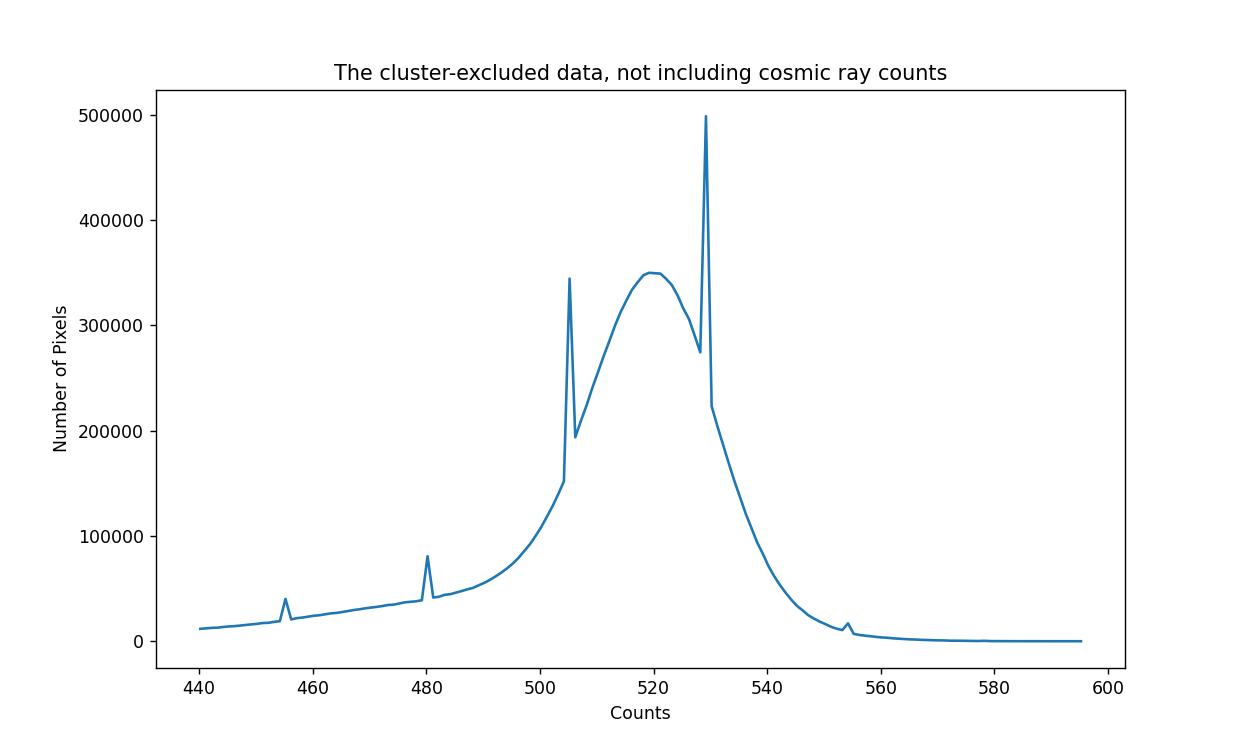

In [10]:
pixels_without_cluster = np.concatenate([m3_data[:1000, :], m3_data[3000:, :], m3_data[1000:3000, :1000], m3_data[1000:3000, 3000:]], axis=None)
#find regions where cluster isnt present

bkg_mean, bkg_median, bkg_std = sigma_clipped_stats(pixels_without_cluster)

min_count = bkg_median - 5*bkg_std
max_count = bkg_median + 5*bkg_std
bins_bkg, num_pixels_bkg = get_background_histogram(pixels_without_cluster, min_count, max_count) #data excluding the cluster, not including cosmic ray counts


plt.figure(figsize = (10,6))
plt.title("The cluster-excluded data, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')

plt.plot(bins_bkg, num_pixels_bkg)


The plots reveal a strange ditrbution with peaks at certain number of counts. The sources of these peaks are unknown